### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №4

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Гусейнов Вахид Азерович
##### Группа:   НБИбд-01-17

## Москва 2020
***

### Вариант № 23

Coil 1999 Competition Data Data Set

Название файла: analysis.data

Ссылка: http://archive.ics.uci.edu/ml/datasets/Coil+1999+Competition+Data

Первый признак: столбец No 4

Второй признак: столбец No 5

Класс: season (столбец No 1)

Алгоритмы: K-means, Affinity Propagation, Mean Shift, mini-batch K-Means

Меры качества: F-мера, парные меры TP, FN, FP, TN, индекс Жаккара

Найти лучший алгоритм кластеризации относительно меры качества: индекс Жаккара

1. Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/coil-mld/analysis.data'
data = pd.read_csv(url, header=None, prefix='V')
data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
0,winter,small_,medium,8.00000,9.80000,60.80000,6.23800,578.00000,105.00000,170.00000,50.00000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small_,medium,8.35000,8.00000,57.75000,1.28800,370.00000,428.75000,558.75000,1.30000,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small_,medium,8.10000,11.40000,40.02000,5.33000,346.66699,125.66700,187.05701,15.60000,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small_,medium,8.07000,4.80000,77.36400,2.30200,98.18200,61.18200,138.70000,1.40000,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small_,medium,8.06000,9.00000,55.35000,10.41600,233.70000,58.22200,97.58000,10.50000,9.2,2.9,7.5,0.0,7.5,4.1,1.0


In [3]:
data = data.replace('XXXXXXX', np.nan)
data = data.dropna()

In [4]:
X = data.iloc[:, [3, 4]]
y = data.iloc[:, 0].values

2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на средние значения для того класса, к которому относится запись с пропущенным значением.

In [5]:
(y == '?').sum() + (X == '?').sum().sum()

0

Пропусков нет.

3.  Если количество различных меток класса больше семи, то объедините некоторые классы, чтобы общее количество классов не превышало семь.

In [6]:
np.unique(y).size

4

Количество классов меньше семи.

4. Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

In [7]:
def plot_classes(X, y):
    plt.figure(figsize=(12,10))
    clusters = np.unique(y)
    for cluster in clusters:
        cluster_idx = np.where(y == cluster)
        plt.scatter(X.iloc[cluster_idx].iloc[:, 0], X.iloc[cluster_idx].iloc[:, 1], label=cluster)
    plt.title('Distribution of classes depends on col 4 and 5')
    plt.legend()
    plt.xlabel('col 4')
    plt.ylabel('col 5')
    plt.show()

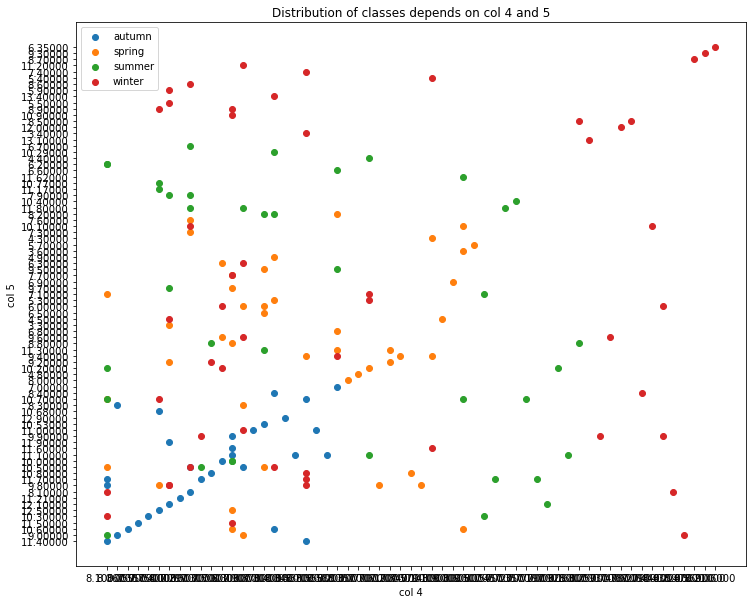

In [8]:
plot_classes(X, y)

5. Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.

In [9]:
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, MiniBatchKMeans

In [10]:
n_clusters = np.unique(y).size

kmeans = KMeans(n_clusters=n_clusters)
kmeans_preds = kmeans.fit_predict(X)

ap = AffinityPropagation()
ap_preds = ap.fit_predict(X)

mshift = MeanShift()
mshift_preds = mshift.fit_predict(X)

minikmeans = MiniBatchKMeans(n_clusters=n_clusters)
minikmeans_preds = minikmeans.fit_predict(X)

C:\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


6. Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности и найдите значения мер качества кластеризации, указанные в индивидуальном задании, не пользуясь функциями из библиотеки scikit-learn.

In [11]:
from sklearn.metrics.cluster import contingency_matrix

def f_measure(matrix):
    F = 0
    for j in range(matrix.shape[1]):
        nij = matrix[:, j].argmax()
        prec = matrix[nij, j] / matrix[:, j].sum()
        rec = matrix[nij, j] / matrix[nij].sum()

        F += 2 * prec * rec / (prec + rec)
    return F / matrix.shape[0]

def jaccard(TP, FP, FN):
    return TP / (TP + FP + FN)

def pair_metrics(matrix):
    TP = (np.sum(matrix ** 2) - matrix.sum()) // 2
    FN = (np.sum(matrix.sum(axis=1) ** 2) - np.sum(matrix ** 2)) // 2
    FP = (np.sum(matrix.sum(axis=0) ** 2) - np.sum(matrix ** 2)) // 2
    N = matrix.sum() * (matrix.sum() - 1) // 2
    TN = N - TP - FN - FP
    return TP, FN, FP, TN

In [12]:
algo_preds = {
    'K-means': kmeans_preds,
    'AffinityPropagation': ap_preds,
    'MeanShift': mshift_preds,
    'MiniBatchKMeans': minikmeans_preds
}
for key, value in algo_preds.items():
    print(f'Algorithm: {key}')
    matrix = contingency_matrix(y, value)
    F = f_measure(matrix)
    TP, FN, FP, TN = pair_metrics(matrix)
    jac = jaccard(TP, FP, FN)
    print(f'F measure = {F}')
    print(f'TP = {TP}')
    print(f'FN = {FN}')
    print(f'FP = {FP}')
    print(f'TN = {TN}')
    print(f'Jaccard = {jac}\n----------------------------------------\n')

Algorithm: K-means
F measure = 0.3554640441108331
TP = 1005
FN = 2491
FP = 2769
TN = 7596
Jaccard = 0.160415003990423
----------------------------------------

Algorithm: AffinityPropagation
F measure = 0.6055393224344633
TP = 407
FN = 3089
FP = 1065
TN = 9300
Jaccard = 0.0892348169261127
----------------------------------------

Algorithm: MeanShift
F measure = 0.11697247706422019
TP = 3496
FN = 0
FP = 10365
TN = 0
Jaccard = 0.25221845465695114
----------------------------------------

Algorithm: MiniBatchKMeans
F measure = 0.36448340549239044
TP = 1244
FN = 2252
FP = 3240
TN = 7125
Jaccard = 0.1846793349168646
----------------------------------------



7. Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

По индексу Жаккара лучший алгортим - MeanShift

8. Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

In [13]:
def plot_clusters(X, y):
    plt.figure(figsize=(12,10))
    clusters = np.unique(y)
    for cluster in clusters:
        cluster_idx = np.where(y == cluster)
        plt.scatter(X.iloc[cluster_idx].iloc[:, 0], X.iloc[cluster_idx].iloc[:, 1], label=cluster)
    plt.title('MeanShift clustering result')
    plt.legend()
    plt.xlabel('col 4')
    plt.ylabel('col 5')
    plt.show()

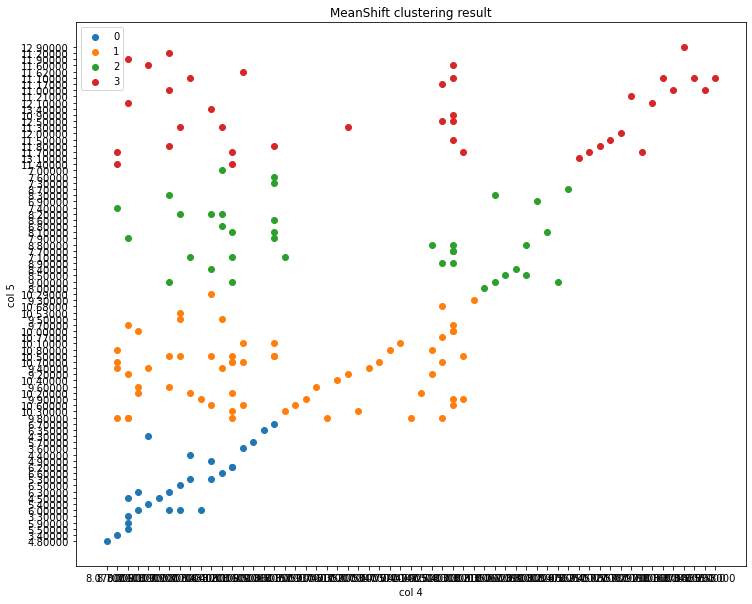

In [14]:
plot_clusters(X, kmeans_preds)